# Proceso para calcular la gráfica de barras en chart decil de epi-species

En las siguientes 7 celdas no modificar nada, son las funciones utilizadas para hacer las operaciones que generan la gráfica de barras

In [1]:
import requests
import json
import math
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_copies(body):
    covariables_count = len(body['covariables'])
    copies = []

    for i in range(covariables_count):
        copy_body = copy.deepcopy(body)
        copy_body['covariables'] = [body['covariables'][i]]

        if body['covariable_filter'] and body['covariable_filter'][body['covariables'][i]]:
            copy_body['covariable_filter'] = {
                body['covariables'][i]: body['covariable_filter'][body['covariables'][i]]
            }
        else:
            copy_body['covariable_filter'] = None

        copies.append(copy_body)

    copies.append(body)
    return(copies)

In [3]:
def hacer_varias_peticiones(petitions):
    url = "https://covid19.c3.unam.mx/gateway/api/analysis/cells/"
    headers = {
        "Content-Type": "application/json"
    }
    
    all_responses = {}  # Diccionario para almacenar todas las respuestas
    
    for petition in petitions:
        data = json.dumps(petition)
        response = requests.post(url, headers=headers, data=data)
        
        if response.status_code == 200:
            resp = response.json()
            data_score_cell = resp["data_score_cell"]
            data_score_cell.sort(key=lambda item: item['tscore'])
            cov_dict = {}
            llave = ' '.join(petition["covariables"])
            cov_dict[llave] = data_score_cell
            all_responses[llave] = cov_dict
        else:
            print("Algo salió mal con la petición:", petition)
    
    return all_responses

In [4]:
def agregar_decil(array):
    
    tscore_values = np.array([item['tscore'] for item in array])

    # Calcular los deciles
    deciles = np.percentile(tscore_values, np.arange(0, 100, 10))

    for item in array:
        tscore = item['tscore']
        decil = np.searchsorted(deciles, tscore)
        decil = np.clip(decil, 1, 10)  # Limitar el decil al rango de 1-10
        item['decil'] = decil

    return array

In [5]:
def contar_elementos_por_decil(array, decil):
    elementos_filtrados = filter(lambda item: item['decil'] == decil, array)
    
    cantidad_elementos = len(list(elementos_filtrados))
    
    return cantidad_elementos


In [6]:
def calcular_promedio_por_decil(array):
    # Diccionario para almacenar las sumas de scores por decil
    decil_data = {}

    for item in array:
        decil = item['decil']
        score = item['tscore']

        if decil in decil_data:
            decil_data[decil]['sum'] += score
            decil_data[decil]['count'] += 1
        else:
            decil_data[decil] = {'sum': score, 'count': 1}

    # Calcular los promedios 
    promedios = []
    for decil, data in decil_data.items():
        avg = data['sum'] / data['count']
        promedios.append({'decil': decil, 'avg': round(avg,2)})

    return promedios

In [7]:
def crear_grafica_barras(promedios):
    fig, ax = plt.subplots(figsize=(10, 10))

    num_promedios = len(promedios)
    width = 0.6 / num_promedios
    deciles = np.arange(1, 11)

    for i, (nombre, promedios_por_decil) in enumerate(promedios.items()):
        avgs = [promedio['avg'] for promedio in promedios_por_decil]
        desplazamiento = i * width - 0.3

        ax.bar(deciles + desplazamiento, avgs, width=width, label=nombre)

        for j, avg in enumerate(avgs):
            ax.text(
                deciles[j] + desplazamiento , avg, str(avg),
                ha='center', va='bottom', fontsize=10  
            )

    ax.set_xlabel('Decil')
    ax.set_ylabel('Avg')
    ax.set_title('Gráfica de barras por decil')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()



El valor c_body puede obtenerse desde la consola de desarrollador: Primero hay que escoger target y variables, luego hacer click en "Ejecutar análisis". Luego en la consola ejecutar el comando: console.log(JSON.stringify(body)) , la consola mostrará un json que puede copiarse y pegarse en la siguiente celda y asignarlo a la variable c_body

In [8]:
c_body = {"selected_decile":[10],"mesh":"mun","covariables":["inegi2020","snib","worldclim"],"covariable_filter":{"inegi2020":[{"taxon":"code","value":"POBFEM"},{"taxon":"code","value":"POBMAS"},{"taxon":"code","value":"P_0A2"},{"taxon":"code","value":"P_0A2_F"},{"taxon":"code","value":"P_0A2_M"},{"taxon":"code","value":"P_3YMAS"},{"taxon":"code","value":"P_18YMAS_M"},{"taxon":"code","value":"P_3YMAS_M"},{"taxon":"code","value":"P_5YMAS"},{"taxon":"code","value":"P_5YMAS_F"},{"taxon":"code","value":"P_5YMAS_M"},{"taxon":"code","value":"P_12YMAS"},{"taxon":"code","value":"P_12YMAS_F"},{"taxon":"code","value":"P_12YMAS_M"},{"taxon":"code","value":"P_15YMAS"},{"taxon":"code","value":"P_15YMAS_F"},{"taxon":"code","value":"P_15YMAS_M"},{"taxon":"code","value":"P_18YMAS"},{"taxon":"code","value":"P_18YMAS_F"},{"taxon":"code","value":"P_3A5"},{"taxon":"code","value":"P_3A5_F"},{"taxon":"code","value":"P_3A5_M"},{"taxon":"code","value":"P_6A11_F"},{"taxon":"code","value":"P_8A14"},{"taxon":"code","value":"P_8A14_F"},{"taxon":"code","value":"P_8A14_M"},{"taxon":"code","value":"P_12A14"},{"taxon":"code","value":"P_12A14_F"},{"taxon":"code","value":"P_12A14_M"},{"taxon":"code","value":"P_15A17_F"},{"taxon":"code","value":"P_15A17_M"},{"taxon":"code","value":"P_18A24"},{"taxon":"code","value":"P_18A24_F"},{"taxon":"code","value":"P_18A24_M"},{"taxon":"code","value":"P_15A49_F"},{"taxon":"code","value":"P_60YMAS"},{"taxon":"code","value":"P_60YMAS_F"},{"taxon":"code","value":"P_60YMAS_M"},{"taxon":"code","value":"REL_H_M"},{"taxon":"code","value":"POB0_14"},{"taxon":"code","value":"POB15_64"},{"taxon":"code","value":"PROM_HNV"},{"taxon":"code","value":"PNACENT"},{"taxon":"code","value":"PNACENT_F"},{"taxon":"code","value":"PNACENT_M"},{"taxon":"code","value":"PNACOE"},{"taxon":"code","value":"PNACOE_F"},{"taxon":"code","value":"PRES2015"},{"taxon":"code","value":"PRES2015_F"},{"taxon":"code","value":"PRES2015_M"},{"taxon":"code","value":"PRESOE15"},{"taxon":"code","value":"PRESOE15_F"},{"taxon":"code","value":"PRESOE15_M"},{"taxon":"code","value":"P3YM_HLI"},{"taxon":"code","value":"P3YM_HLI_F"},{"taxon":"code","value":"P3YM_HLI_M"},{"taxon":"code","value":"P3HLINHE_F"},{"taxon":"code","value":"P3HLINHE_M"},{"taxon":"code","value":"P3HLI_HE"},{"taxon":"code","value":"P3HLI_HE_F"},{"taxon":"code","value":"P3HLI_HE_M"},{"taxon":"code","value":"P5_HLI"},{"taxon":"code","value":"P5_HLI_NHE"},{"taxon":"code","value":"P5_HLI_HE"},{"taxon":"code","value":"PHOG_IND"},{"taxon":"code","value":"POB_AFRO"},{"taxon":"code","value":"POB_AFRO_F"},{"taxon":"code","value":"POB_AFRO_M"},{"taxon":"code","value":"PCON_DISC"},{"taxon":"code","value":"PCDISC_MOT"},{"taxon":"code","value":"PCDISC_VIS"},{"taxon":"code","value":"PCDISC_LENG"},{"taxon":"code","value":"PCDISC_AUD"},{"taxon":"code","value":"PCDISC_MOT2"},{"taxon":"code","value":"PCDISC_MEN"},{"taxon":"code","value":"PCON_LIMI"},{"taxon":"code","value":"PCLIM_CSB"},{"taxon":"code","value":"PCLIM_HACO"},{"taxon":"code","value":"PCLIM_OAUD"},{"taxon":"code","value":"PCLIM_MOT2"},{"taxon":"code","value":"PCLIM_RE_CO"},{"taxon":"code","value":"PCLIM_PMEN"},{"taxon":"code","value":"PSIND_LIM"},{"taxon":"code","value":"P3A5_NOA"},{"taxon":"code","value":"P3A5_NOA_F"},{"taxon":"code","value":"P3A5_NOA_M"},{"taxon":"code","value":"P6A11_NOA"},{"taxon":"code","value":"P6A11_NOAF"},{"taxon":"code","value":"P6A11_NOAM"},{"taxon":"code","value":"P12A14NOA"},{"taxon":"code","value":"P12A14NOAF"},{"taxon":"code","value":"P12A14NOAM"},{"taxon":"code","value":"P15A17A_F"},{"taxon":"code","value":"P15A17A_M"},{"taxon":"code","value":"P18A24A"},{"taxon":"code","value":"P18A24A_F"},{"taxon":"code","value":"P18A24A_M"},{"taxon":"code","value":"P8A14AN"},{"taxon":"code","value":"P8A14AN_F"},{"taxon":"code","value":"P8A14AN_M"},{"taxon":"code","value":"P15YM_AN"},{"taxon":"code","value":"P15YM_AN_F"},{"taxon":"code","value":"P15YM_SE"},{"taxon":"code","value":"P15YM_SE_F"},{"taxon":"code","value":"P15YM_SE_M"},{"taxon":"code","value":"P15PRI_IN"},{"taxon":"code","value":"P15PRI_INF"},{"taxon":"code","value":"P15PRI_INM"},{"taxon":"code","value":"P15PRI_CO"},{"taxon":"code","value":"P15PRI_COF"},{"taxon":"code","value":"P15PRI_COM"},{"taxon":"code","value":"P15SEC_IN"},{"taxon":"code","value":"P15SEC_INM"},{"taxon":"code","value":"P15SEC_CO"},{"taxon":"code","value":"P15SEC_COF"},{"taxon":"code","value":"P15SEC_COM"},{"taxon":"code","value":"P18YM_PB"},{"taxon":"code","value":"P18YM_PB_F"},{"taxon":"code","value":"P18YM_PB_M"},{"taxon":"code","value":"GRAPROES"},{"taxon":"code","value":"GRAPROES_F"},{"taxon":"code","value":"GRAPROES_M"},{"taxon":"code","value":"PEA"},{"taxon":"code","value":"PEA_F"},{"taxon":"code","value":"PEA_M"},{"taxon":"code","value":"PE_INAC"},{"taxon":"code","value":"PE_INAC_F"},{"taxon":"code","value":"PE_INAC_M"},{"taxon":"code","value":"POCUPADA"},{"taxon":"code","value":"POCUPADA_F"},{"taxon":"code","value":"POCUPADA_M"},{"taxon":"code","value":"PDESOCUP"},{"taxon":"code","value":"PDESOCUP_F"},{"taxon":"code","value":"PSINDER"},{"taxon":"code","value":"PDER_SS"},{"taxon":"code","value":"PDER_IMSS"},{"taxon":"code","value":"PDER_ISTE"},{"taxon":"code","value":"PDER_ISTEE"},{"taxon":"code","value":"PAFIL_PDOM"},{"taxon":"code","value":"PDER_SEGP"},{"taxon":"code","value":"PDER_IMSSB"},{"taxon":"code","value":"PAFIL_IPRIV"},{"taxon":"code","value":"PAFIL_OTRAI"},{"taxon":"code","value":"P12YM_CASA"},{"taxon":"code","value":"P12YM_SEPA"},{"taxon":"code","value":"PCATOLICA"},{"taxon":"code","value":"PRO_CRIEVA"},{"taxon":"code","value":"POTRAS_REL"},{"taxon":"code","value":"TOTHOG"},{"taxon":"code","value":"HOGJEF_F"},{"taxon":"code","value":"HOGJEF_M"},{"taxon":"code","value":"POBHOG"},{"taxon":"code","value":"PHOGJEF_F"},{"taxon":"code","value":"PHOGJEF_M"},{"taxon":"code","value":"POBTOT"},{"taxon":"code","value":"P_3YMAS_F"},{"taxon":"code","value":"P3HLINHE"},{"taxon":"code","value":"P_6A11"},{"taxon":"code","value":"P_6A11_M"},{"taxon":"code","value":"P_15A17"},{"taxon":"code","value":"PNACOE_M"},{"taxon":"code","value":"POB65_MAS"},{"taxon":"code","value":"PCLIM_VIS"},{"taxon":"code","value":"P15A17A"},{"taxon":"code","value":"P15YM_AN_M"},{"taxon":"code","value":"P15SEC_INF"},{"taxon":"code","value":"VIVPAR_DES"},{"taxon":"code","value":"PDESOCUP_M"},{"taxon":"code","value":"P12YM_SOLT"},{"taxon":"code","value":"TVIVPAR"},{"taxon":"code","value":"PSIN_RELIG"},{"taxon":"code","value":"VIVPAR_HAB"},{"taxon":"code","value":"VIVTOT"},{"taxon":"code","value":"VPH_2YMASD"},{"taxon":"code","value":"TVIVHAB"},{"taxon":"code","value":"TVIVPARHAB"},{"taxon":"code","value":"VIVPAR_UT"},{"taxon":"code","value":"OCUPVIVPAR"},{"taxon":"code","value":"PROM_OCUP"},{"taxon":"code","value":"PRO_OCUP_C"},{"taxon":"code","value":"VPH_PISODT"},{"taxon":"code","value":"VPH_PISOTI"},{"taxon":"code","value":"VPH_1DOR"},{"taxon":"code","value":"VPH_NDEAED"},{"taxon":"code","value":"VPH_1CUART"},{"taxon":"code","value":"VPH_2CUART"},{"taxon":"code","value":"VPH_3YMASC"},{"taxon":"code","value":"VPH_C_ELEC"},{"taxon":"code","value":"VPH_S_ELEC"},{"taxon":"code","value":"VPH_AGUADV"},{"taxon":"code","value":"VPH_AEASP"},{"taxon":"code","value":"VPH_AGUAFV"},{"taxon":"code","value":"VPH_TINACO"},{"taxon":"code","value":"VPH_CISTER"},{"taxon":"code","value":"VPH_EXCSA"},{"taxon":"code","value":"VPH_LETR"},{"taxon":"code","value":"VPH_DRENAJ"},{"taxon":"code","value":"VPH_NODREN"},{"taxon":"code","value":"VPH_C_SERV"},{"taxon":"code","value":"VPH_DSADMA"},{"taxon":"code","value":"VPH_NDACMM"},{"taxon":"code","value":"VPH_SNBIEN"},{"taxon":"code","value":"VPH_HMICRO"},{"taxon":"code","value":"VPH_REFRI"}],"snib":[{"taxon":"class","value":"Mammalia"}],"worldclim":[{"taxon":"layer","value":"./mex_wc2.1_30s_bio_2.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_3.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_1.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_4.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_13.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_18.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_5.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_7.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_6.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_19.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_8.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_16.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_9.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_10.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_11.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_12.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_14.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_15.tif"},{"taxon":"layer","value":"./mex_wc2.1_30s_bio_17.tif"}]},"target":{"species":{"taxon":"family","value":"Hominidae"},"disease":"Leishmaniasis","agent":"hospedero"},"target_attribute_filter":[],"lim_inf_first":"2021-04-03","lim_sup_first":"2021-05-02","lim_inf_training":"2021-05-03","lim_sup_training":"2021-06-02","lim_inf_validation":"2021-06-03","lim_sup_validation":"2021-07-02"}

In [9]:
copies =generate_copies(c_body)

In [10]:
responses=hacer_varias_peticiones(copies)

In [11]:
for key in responses.keys():
    print(key)

inegi2020
snib
worldclim
inegi2020 snib worldclim


In [12]:
for key in responses.keys():
    responses[key]= agregar_decil(responses[key][key])

In [13]:
for key in responses.keys():
    print(f"Covariable: {key}")
    for i in range(1,11):
        print(f"El decil {i} tiene {contar_elementos_por_decil(responses[key],i)} elementos")

Covariable: inegi2020
El decil 1 tiene 247 elementos
El decil 2 tiene 247 elementos
El decil 3 tiene 247 elementos
El decil 4 tiene 247 elementos
El decil 5 tiene 247 elementos
El decil 6 tiene 246 elementos
El decil 7 tiene 247 elementos
El decil 8 tiene 247 elementos
El decil 9 tiene 247 elementos
El decil 10 tiene 247 elementos
Covariable: snib
El decil 1 tiene 204 elementos
El decil 2 tiene 204 elementos
El decil 3 tiene 204 elementos
El decil 4 tiene 206 elementos
El decil 5 tiene 201 elementos
El decil 6 tiene 204 elementos
El decil 7 tiene 203 elementos
El decil 8 tiene 204 elementos
El decil 9 tiene 204 elementos
El decil 10 tiene 204 elementos
Covariable: worldclim
El decil 1 tiene 246 elementos
El decil 2 tiene 246 elementos
El decil 3 tiene 246 elementos
El decil 4 tiene 245 elementos
El decil 5 tiene 246 elementos
El decil 6 tiene 246 elementos
El decil 7 tiene 245 elementos
El decil 8 tiene 246 elementos
El decil 9 tiene 246 elementos
El decil 10 tiene 246 elementos
Covari

In [14]:
promedios={}
for key in responses.keys():
    promedios[key]=calcular_promedio_por_decil(responses[key]) 

In [15]:
for key in promedios.keys():
    print(key)
    for i in promedios[key]:        
        print(i)

inegi2020
{'decil': 1, 'avg': -200.4}
{'decil': 2, 'avg': -137.98}
{'decil': 3, 'avg': -111.39}
{'decil': 4, 'avg': -94.23}
{'decil': 5, 'avg': -79.11}
{'decil': 6, 'avg': -64.92}
{'decil': 7, 'avg': -50.84}
{'decil': 8, 'avg': -33.45}
{'decil': 9, 'avg': -12.79}
{'decil': 10, 'avg': 19.93}
snib
{'decil': 1, 'avg': -26.53}
{'decil': 2, 'avg': -6.78}
{'decil': 3, 'avg': -2.52}
{'decil': 4, 'avg': 0.08}
{'decil': 5, 'avg': 1.19}
{'decil': 6, 'avg': 2.28}
{'decil': 7, 'avg': 4.13}
{'decil': 8, 'avg': 7.7}
{'decil': 9, 'avg': 16.38}
{'decil': 10, 'avg': 53.68}
worldclim
{'decil': 1, 'avg': -61.96}
{'decil': 2, 'avg': -39.88}
{'decil': 3, 'avg': -28.11}
{'decil': 4, 'avg': -20.38}
{'decil': 5, 'avg': -13.71}
{'decil': 6, 'avg': -5.57}
{'decil': 7, 'avg': 3.75}
{'decil': 8, 'avg': 14.24}
{'decil': 9, 'avg': 25.06}
{'decil': 10, 'avg': 43.09}
inegi2020 snib worldclim
{'decil': 1, 'avg': -321.01}
{'decil': 2, 'avg': -220.73}
{'decil': 3, 'avg': -165.97}
{'decil': 4, 'avg': -130.63}
{'decil': 5

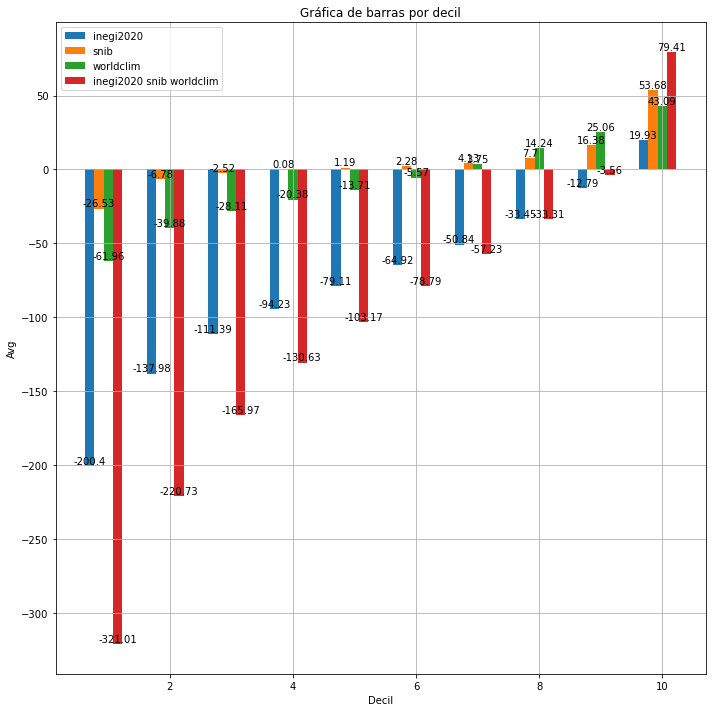

In [16]:
crear_grafica_barras(promedios)